# 1. Project Information

## 1.1 Metadata Project

- Project Name     : Google Capstone Track 1 Case Study 1: Cyclistic 2024
- Analyst         : Ricardo Situmorang
- Stakeholder     : Marketing directors and managers; Marketing analytics team; Executive team

## 1.2 Import Library used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 2. Business Understanding

## 2.1 Business Background

__Increase profitability by converting casual customers into annual members.__
<p>Financial analysts have found that annual memberships are significantly more profitable, and rather than seeking new customers, Cyclistic believes there's a significant opportunity to convert casual riders already familiar with its services. To achieve this, the marketing team needs to analyze bike travel data to understand the behavioral differences between casual riders and annual members, which will form the basis for designing an effective digital marketing strategy.

## 2.2 Objectives

1. Which bicycle type will be in high demand in 2024?
2. Which bicycle type has the longest average usage time?
3. What is the trend in bicycle usage over the year (months & days)?
4. Where are the most popular locations (member vs. casual)?

## 2.3 Data Description

- **ride_id**: Unique ID for each bike trip.
- **rideable_type**: Type of bike used (electric bike, classic bike, electric scooter)
- **started_at**: Time/date when the trip started
- **ended_at**: Time/date when the trip ended
- **start_station_name**: Name of the starting station (departure location)
- **start_station_id**: Unique ID for each starting station
- **ended_station_name**: Name of the destination station (end location)
- **ended_station_id**: Unique ID for each ending station
- **start_lat**: Starting latitude coordinate
- **start_lng**: Starting longitude coordinate
- **end_lat**: Ending latitude coordinate
- **end_lng**: Ending longitude coordinate
- **member_casual**: Name of user type (member and casual)
- **ride_length**: Trip duration (minutes)

# 3. Data Preparation

## 3.1 Gathering Data

In [2]:
df_jan = pd.read_csv('202401-divvy-tripdata.csv')
df_feb = pd.read_csv('202402-divvy-tripdata.csv')
df_mar = pd.read_csv('202403-divvy-tripdata.csv')
df_apr = pd.read_csv('202404-divvy-tripdata.csv')
df_mei = pd.read_csv('202405-divvy-tripdata.csv')
df_jun = pd.read_csv('202406-divvy-tripdata.csv')
df_jul = pd.read_csv('202407-divvy-tripdata.csv')
df_agu = pd.read_csv('202408-divvy-tripdata.csv')
df_sep = pd.read_csv('202409-divvy-tripdata.csv')
df_okt = pd.read_csv('202410-divvy-tripdata.csv')
df_nov = pd.read_csv('202411-divvy-tripdata.csv')
df_des = pd.read_csv('202412-divvy-tripdata.csv')

In [3]:
df_2024 = pd.concat([df_jan, df_feb, df_mar, df_apr, df_mei, df_jun, df_jul, df_agu, df_sep, df_okt, df_nov, df_des], ignore_index=True)
df_2024.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C1D650626C8C899A,electric_bike,2024/1/12,2024/1/12,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,NaN
1,EECD38BDB25BFCB0,electric_bike,2024/1/8,2024/1/8,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,NaN
2,F4A9CE78061F17F7,electric_bike,2024/1/27,2024/1/27,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,NaN
3,0A0D9E15EE50B171,classic_bike,2024/1/29,2024/1/29,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.88,-87.63,41.92,-87.64,member,NaN
4,33FFC9805E3EFF9A,classic_bike,2024/1/31,2024/1/31,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.95,-87.68,41.89,-87.64,member,NaN


In [4]:
df_2024.info()
df_2024.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
dtypes: float64(4), object(10)
memory usage: 626.0+ MB


,start_lat,start_lng,end_lat,end_lng
count,5.860568e+06,5.860568e+06,5.853336e+06,5.853336e+06
mean,4.190216e+01,-8.764620e+01,4.190255e+01,-8.764642e+01
std,4.475306e-02,2.751736e-02,5.598677e-02,1.136892e-01
min,4.164000e+01,-8.791000e+01,1.606000e+01,-1.440500e+02
25%,4.188000e+01,-8.766000e+01,4.188000e+01,-8.766000e+01
50%,4.189766e+01,-8.764129e+01,4.189859e+01,-8.764182e+01
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.752000e+01,8.796000e+01,1.525300e+02


In [5]:
# Fix date format
df_2024['started_at'] = pd.to_datetime(df_2024['started_at'], format='mixed')
df_2024['ended_at'] = pd.to_datetime(df_2024['ended_at'], format='mixed')

## 3.2 Cleaning Data

### 3.2.1 Missing Values

In [6]:
df_2024.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
ride_length           5111606
dtype: int64

In [7]:
# Discards rows with null values ​​in columns 'start_lat', 'start_lng', 'end_lat', and 'end_lng'
df_2024 = df_2024.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [8]:
# Fills the null value in the 'ride_length' column with the difference between 'ended_at' and 'started_at' in minutes.
df_2024['ride_length'] = (df_2024['ended_at'] - df_2024['started_at']).dt.total_seconds() /60

### 3.2.2 Data Duplicated & Inconsistencies

In [9]:
df_2024['ride_id'].duplicated().sum()

171

In [10]:
df_2024 = df_2024.drop_duplicates(subset=['ride_id'], keep='first').reset_index(drop=True)

In [11]:
df_2024.info()
df_2024.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853165 entries, 0 to 5853164
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 625.2+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C1D650626C8C899A,electric_bike,2024-01-12,2024-01-12,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
1,EECD38BDB25BFCB0,electric_bike,2024-01-08,2024-01-08,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
2,F4A9CE78061F17F7,electric_bike,2024-01-27,2024-01-27,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
3,0A0D9E15EE50B171,classic_bike,2024-01-29,2024-01-29,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.88,-87.63,41.92,-87.64,member,0.0
4,33FFC9805E3EFF9A,classic_bike,2024-01-31,2024-01-31,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.95,-87.68,41.89,-87.64,member,0.0
5,C96080812CD285C5,classic_bike,2024-01-07,2024-01-07,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
6,0EA7CB313D4F456A,classic_bike,2024-01-05,2024-01-05,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
7,EE11F3A3B39CFBD8,electric_bike,2024-01-04,2024-01-04,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
8,63E83DE8E3279F15,classic_bike,2024-01-01,2024-01-01,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member,0.0
9,8005682869122D93,electric_bike,2024-01-03,2024-01-03,Clark St & Ida B Wells Dr,TA1305000009,Kingsbury St & Kinzie St,KA1503000043,41.88,-87.63,41.89,-87.64,member,0.0


In [12]:
# Checking Inconsistencies in the 'rideable_type' column
df_2024['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'electric_scooter'], dtype=object)

In [13]:
# Checking Inconsistencies in the 'member_casual' column
df_2024['member_casual'].unique()

array(['member', 'casual'], dtype=object)

### 3.2.3 Outliers

In [14]:
# Checking normal bicycle usage > 1 Day
df_2024.sort_values(by='ride_length', ascending=False).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
2664267,6D8AADB1A3814EA3,classic_bike,2024-07-06 00:00:00.000,2024-07-08 00:00:00.000,MLK Jr Dr & 29th St,TA1307000139,NaN,NaN,41.840000,-87.620000,41.840000,-87.620000,casual,2880.000000
422880,7A5CAAC52FAE9E95,classic_bike,2024-03-09 16:58:39.000,2024-03-10 18:08:01.000,Talman Ave & Addison St,15632,Talman Ave & Addison St,15632,41.946636,-87.694615,41.946636,-87.694615,casual,1509.366667
946921,3F95397BA3FDE147,classic_bike,2024-04-21 12:43:32.000,2024-04-22 13:44:03.000,Leavitt St & Belmont Ave,KA17018068,NaN,NaN,41.939354,-87.683282,41.930000,-87.670000,casual,1500.516667
604622,927277B01FED35FB,classic_bike,2024-03-03 09:49:12.000,2024-03-04 10:49:09.000,Southport Ave & Wellington Ave,TA1307000006,NaN,NaN,41.935775,-87.663600,41.920000,-87.650000,casual,1499.950000
2154469,62AFC24F8D18C398,classic_bike,2024-06-07 22:09:52.929,2024-06-08 23:09:49.769,Federal St & Polk St,SL-008,NaN,NaN,41.872078,-87.629544,41.870000,-87.620000,casual,1499.947333
5853033,DD874571A547DA8A,classic_bike,2024-12-04 11:58:58.684,2024-12-05 12:58:55.212,Grace St & Cicero Ave,21322,NaN,NaN,41.949730,-87.746950,41.950000,-87.740000,casual,1499.942133
5213118,7CB5FC42586AEB03,classic_bike,2024-10-24 14:34:26.399,2024-10-25 15:34:22.901,Clark St & Chicago Ave,13303,NaN,NaN,41.896750,-87.630890,41.900000,-87.620000,casual,1499.941700
5851977,10DCEDF34E622FC0,classic_bike,2024-12-09 23:56:01.402,2024-12-11 00:55:57.833,Wentworth Ave & 33rd St,15445,NaN,NaN,41.834530,-87.631823,41.740000,-87.640000,casual,1499.940517
3968245,4C3E48DBCD649994,classic_bike,2024-09-24 16:14:07.888,2024-09-25 17:14:04.217,Laramie Ave & Irving Park Rd,23163,NaN,NaN,41.953335,-87.758384,41.940000,-87.740000,casual,1499.938817
2394251,EA66F74325EA7311,classic_bike,2024-06-10 18:53:45.300,2024-06-11 19:53:41.627,Artesian Ave & Hubbard St,15664,NaN,NaN,41.889500,-87.688257,41.910000,-87.680000,casual,1499.938783


In [15]:
# Check rows with value 0 in column 'ride_length'
df_zero = df_2024[df_2024['ride_length'] <= 0]
df_zero['ride_length'].nunique()

101

In [16]:
# Drop outliers
df_2024 = df_2024[(df_2024['ride_length'] > 0) & (df_2024['ride_length'] <= 1440)]

# 4. Exploratory Data Analysis (EDA)

## 4.1 Which Type of Bicycle will have high demand in 2024?

In [17]:
type_ride = df_2024.groupby(['rideable_type', 'member_casual']).size().unstack()    
print(type_ride)

member_casual     casual   member
rideable_type                    
classic_bike      800782  1483715
electric_bike     917446  1617308
electric_scooter   85215    59122


## 4.2 Which type of bicycle has the longest average usage?

In [18]:
long_df = df_2024.groupby(['rideable_type', 'member_casual'])['ride_length'].mean().unstack()
print(long_df)

member_casual        casual     member
rideable_type                         
classic_bike      31.151505  14.013537
electric_bike     15.598965  11.892310
electric_scooter  11.937651   8.239676


## 4.3 What is the trend in the number of bicycle usage in a year (month & day)?

In [19]:
# Creating a Month column
df_2024['month'] = pd.to_datetime(df_2024['started_at']).dt.month_name()

# Creating a Day column
df_2024['day'] = pd.to_datetime(df_2024['started_at']).dt.day_name()

# Sort the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

### 4.3.1 Casual Users

In [20]:
# Filtering for 'casual' user type
casual_df = df_2024[df_2024['member_casual'] == 'casual']

# Trends per Month
casual_month = casual_df.groupby(['month', 'rideable_type']).size().unstack().reindex(month_order)
print(casual_month)

rideable_type  classic_bike  electric_bike  electric_scooter
month                                                       
January                81.0           44.0               NaN
February            27584.0        19347.0               NaN
March               39305.0        42895.0               NaN
April               57407.0        73930.0               NaN
May                115952.0       114282.0               NaN
June               141237.0       158917.0               NaN
July                 1332.0          725.0               NaN
August             148020.0       169459.0              63.0
September          120391.0       140311.0           85152.0
October             97624.0       118309.0               NaN
November            38813.0        54000.0               NaN
December            13036.0        25227.0               NaN


In [21]:
# Daily Trends
casual_day = casual_df.groupby(['day', 'rideable_type'])['ride_id'].size().unstack().reindex(day_order)
print(casual_day)

rideable_type  classic_bike  electric_bike  electric_scooter
day                                                         
Monday                91873         107223             12476
Tuesday               79097         102560             10122
Wednesday             90289         116396             11466
Thursday              88812         118828             11996
Friday               112550         138313             12235
Saturday             180526         180361             13497
Sunday               157635         153765             13423


### 4.3.2 Member Users

In [22]:
# Filter for user type 'member'
member_df = df_2024[df_2024['member_casual'] == 'member']

# Trends per Month
member_month = member_df.groupby(['month', 'rideable_type'])['ride_id'].size().unstack().reindex(month_order)
print(member_month)

rideable_type  classic_bike  electric_bike  electric_scooter
month                                                       
January               232.0           98.0               NaN
February           112357.0        63480.0               NaN
March              108853.0       110113.0               NaN
April              130463.0       152520.0               NaN
May                189989.0       188184.0               NaN
June               195319.0       214081.0               NaN
July                  568.0          725.0               NaN
August             203974.0       233266.0              19.0
September          193217.0       221962.0           59103.0
October            182394.0       217361.0               NaN
November           109003.0       132904.0               NaN
December            57346.0        82614.0               NaN


In [23]:
# Daily Trends
member_day = member_df.groupby(['day', 'rideable_type'])['ride_id'].size().unstack().reindex(day_order)
print(member_day)

rideable_type  classic_bike  electric_bike  electric_scooter
day                                                         
Monday               216196         223532              9083
Tuesday              227939         243460              9042
Wednesday            237402         258395              9923
Thursday             227964         252254              9918
Friday               206111         240131              8095
Saturday             192318         215157              6766
Sunday               175785         184379              6295


## 4.4 Where are the most frequently used locations?

### 4.4.1 Member Users

In [24]:
located_member = member_df.groupby(['start_station_name', 'start_lat', 'start_lng'])['ride_id'].count().sort_values(ascending=False)
print(located_member.head(50))

start_station_name                  start_lat  start_lng 
Kingsbury St & Kinzie St            41.889177  -87.638506    20004
Clinton St & Washington Blvd        41.883380  -87.641170    17567
Clark St & Elm St                   41.902973  -87.631280    17001
Clinton St & Madison St             41.882752  -87.641190    16493
University Ave & 57th St            41.791478  -87.599861    14703
Wells St & Concord Ln               41.912133  -87.634656    13919
Clinton St & Jackson Blvd           41.878317  -87.640981    13720
Wells St & Elm St                   41.903222  -87.634324    13531
Dearborn St & Erie St               41.893992  -87.629318    13349
Canal St & Madison St               41.882409  -87.639767    13124
Ellis Ave & 60th St                 41.785097  -87.601073    13094
State St & Chicago Ave              41.896617  -87.628579    12650
DuSable Lake Shore Dr & North Blvd  41.911722  -87.626804    11671
Ellis Ave & 55th St                 41.794301  -87.601450    11476
Broa

### 4.4.2 Casual Users

In [25]:
located_casual = casual_df.groupby(['start_station_name', 'start_lat', 'start_lng'])['ride_id'].count().sort_values(ascending=False)
print(located_casual.head(50))

start_station_name                      start_lat  start_lng 
Streeter Dr & Grand Ave                 41.892278  -87.612043    36645
DuSable Lake Shore Dr & Monroe St       41.880958  -87.616743    25287
Michigan Ave & Oak St                   41.900960  -87.623777    17072
Millennium Park                         41.881032  -87.624084    16171
DuSable Lake Shore Dr & North Blvd      41.911722  -87.626804    15920
Shedd Aquarium                          41.867226  -87.615355    14895
Dusable Harbor                          41.886976  -87.612813    12817
Theater on the Lake                     41.926277  -87.630834    11535
Michigan Ave & 8th St                   41.872773  -87.623981    10005
Adler Planetarium                       41.866095  -87.607267     9021
Indiana Ave & Roosevelt Rd              41.867888  -87.623041     8705
Wells St & Concord Ln                   41.912133  -87.634656     7741
Montrose Harbor                         41.963982  -87.638181     7594
Clark St & Armi

# 5. Visualization Data

## 5.1 The most popular type of bicycle

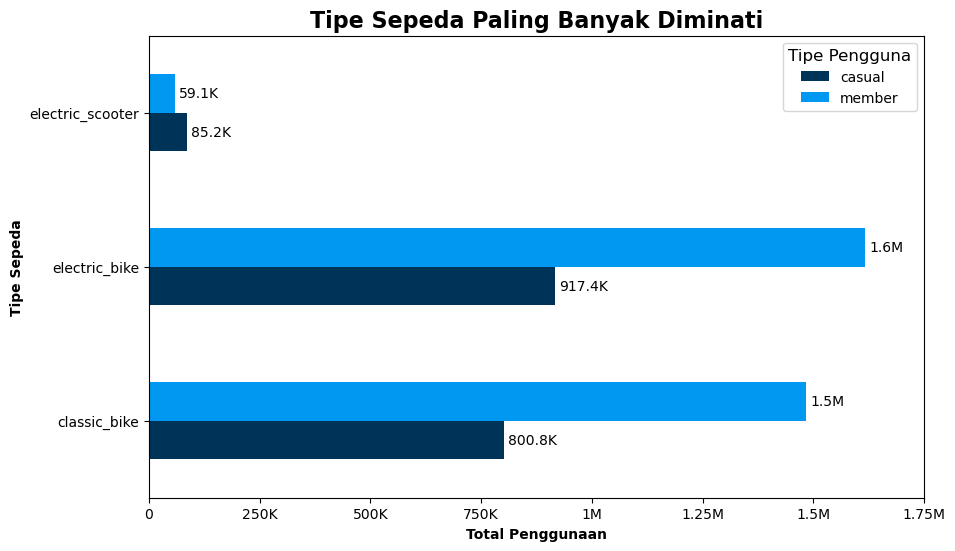

In [26]:
# Format Number Function
def format_number1(x, pos=None):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Visualization of the Most Popular Bike Types
ax = type_ride.plot(kind='barh', stacked=False, figsize=(10,6), color=["#003358", "#0098f0"])
ax.set_title('Tipe Sepeda Paling Banyak Diminati', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Penggunaan', fontweight='bold')
ax.set_ylabel('Tipe Sepeda', fontweight='bold')
ax.legend(title='Tipe Pengguna', title_fontsize='12', fontsize='10')
ax_xticks_locations = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000]
ax_xticks_labels = ['0', '250K', '500K', '750K', '1M', '1.25M', '1.5M', '1.75M']
ax.set_xticks(rotation=0, ticks=ax_xticks_locations, labels=ax_xticks_labels)
for container in ax.containers:
    ax.bar_label(container, fmt=format_number1, label_type='edge', padding=3, fontsize=10)
plt.show()

## 5.2 The type of bicycle that has been used the longest on average

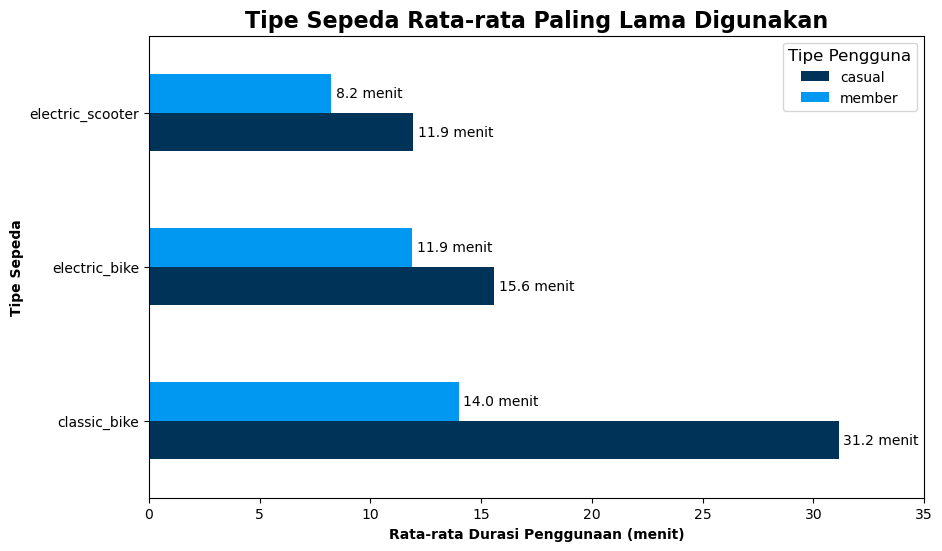

In [27]:
ax1 = long_df.plot(kind='barh', stacked=False, figsize=(10,6), color=["#003358", "#0098f0"])
plt.title('Tipe Sepeda Rata-rata Paling Lama Digunakan', fontsize=16, fontweight='bold')
plt.xlabel('Rata-rata Durasi Penggunaan (menit)', fontweight='bold')
plt.ylabel('Tipe Sepeda', fontweight='bold')
ax.legend(title='Tipe Pengguna', title_fontsize='12', fontsize='10')
ax1_xticks_locations = [0, 5, 10, 15, 20, 25, 30, 35]
ax1_xticks_labels = ['0', '5', '10', '15', '20', '25', '30', '35']
ax1.set_xticks(rotation=0, ticks=ax1_xticks_locations, labels=ax1_xticks_labels)
plt.legend(title='Tipe Pengguna', title_fontsize='12', fontsize='10')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f menit', label_type='edge', padding=3, fontsize=10)
plt.show()

## 5.3 Trend in number of usage in 2024

### 5.3.1 Monthly Trends

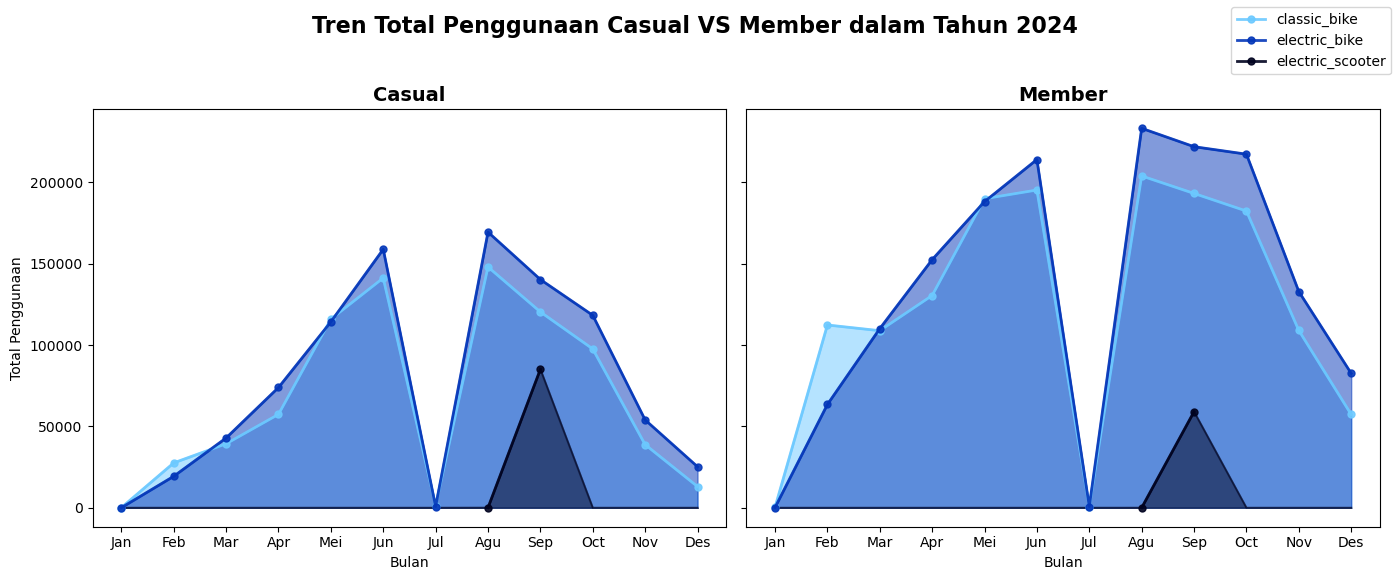

In [28]:
colors = [
    "#6CC9FF", 
    "#0437B9", 
    "#00021F"
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6), sharey = True)

# Casual
casual_month.plot(kind='area', ax = ax1, stacked=False, color=colors, legend=False)
casual_month.plot(kind='line', ax = ax1, marker='o', markersize=5, 
               linewidth=2, color=colors, alpha=0.9)
ax1.set_title('Casual', fontweight='bold', fontsize=14)
ax1.set_ylabel('Total Penggunaan')
ax1.set_xlabel('Bulan')

# Member
member_month.plot(kind='area', ax = ax2, stacked=False, color=colors, legend=False)
member_month.plot(kind='line', ax = ax2, marker='o', markersize=5, 
               linewidth=2, color=colors, alpha=0.9)
ax2.set_title('Member', fontweight='bold', fontsize=14)
ax2.set_ylabel('')
ax2.set_xlabel('Bulan')

plt.suptitle("Tren Total Penggunaan Casual VS Member dalam Tahun 2024", fontweight='bold', fontsize = 16)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles[-3:], labels[-3:], loc='upper right', ncol=1)
ax1.get_legend().remove()
ax2.get_legend().remove()

xtick2_location = range(len(member_month))
xtick2_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Oct', 'Nov', 'Des']
ax1.set_xticks(rotation = 0, ticks=xtick2_location, labels=xtick2_labels)
ax2.set_xticks(rotation = 0, ticks=xtick2_location, labels=xtick2_labels)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 5.3.2 Daily Trends

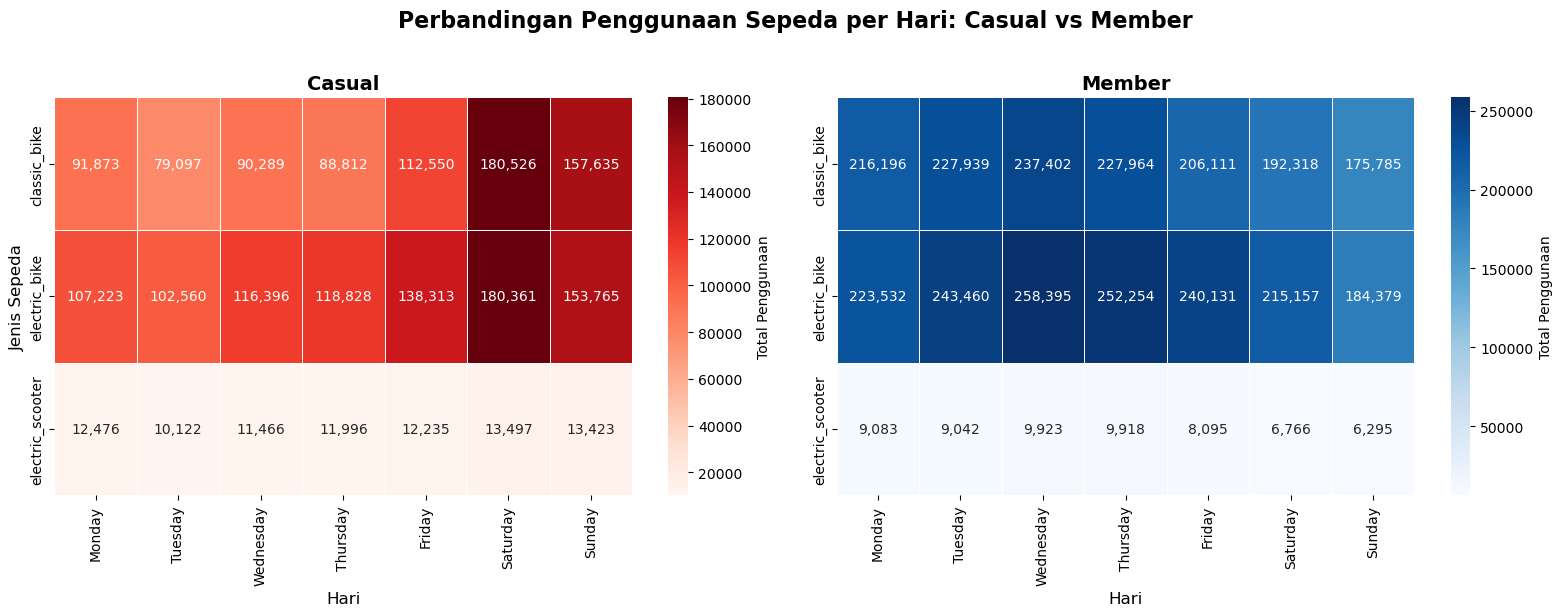

In [29]:
# Create side by side subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

# Heatmap Casual
sns.heatmap(casual_day.T, annot=True, fmt=',d', cmap='Reds', 
            cbar_kws={'label':'Total Penggunaan'}, ax=ax1,
            linewidths=0.5, linecolor='white')
ax1.set_title("Casual", fontsize=14, fontweight='bold')
ax1.set_xlabel("Hari", fontsize=12)
ax1.set_ylabel("Jenis Sepeda", fontsize=12)

# Heatmap Member
sns.heatmap(member_day.T, annot=True, fmt=',d', cmap='Blues', 
            cbar_kws={'label':'Total Penggunaan'}, ax=ax2,
            linewidths=0.5, linecolor='white')
ax2.set_title("Member", fontsize=14, fontweight='bold')
ax2.set_xlabel("Hari", fontsize=12)
ax2.set_ylabel("")

plt.suptitle("Perbandingan Penggunaan Sepeda per Hari: Casual vs Member", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 5.4 Most used locations (Casual & Member)

In [ ]:
# Take Top 50 locations
top_member50 = located_member.head(50).reset_index() 
top_casual50 = located_casual.head(50).reset_index()

# Center Coordinates = Kingsbury St & Kenzie St (41.889177, -87.638506)
m = folium.Map(location=[41.889177, -87.638506], zoom_start=12)
for _, row in top_member50.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=row['ride_id'] / 5000,  # Skala radius
        popup=f"{row['start_station_name']}: {row['ride_id']} rides",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)
for _, row in top_casual50.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=row['ride_id'] / 5000,  # Skala radius
        popup=f"{row['start_station_name']}: {row['ride_id']} rides",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)
m

# Save the map to an HTML file
m.save('top_locations_map.html')

# 6. Conclusion

**1. Which bicycle type will be in high demand in 2024?**
<p> The analysis shows that bicycles are more widely used by members than casual users. The most popular type of bicycle is electric bikes (2.5 million rides), followed by classic bikes (2.2 million rides), which is not significantly lower than electric bikes. The least popular type is electric scooters (144,000 rides).

**2. Which bicycle type has the longest average usage time?**
<p> The analysis showed that casual users spent longer on average than members. The bike types with the longest usage time among members were classic bikes (31 minutes), electric bikes (15 minutes), and electric scooters (12 minutes). Casual users spent the longest on classic bikes (14 minutes), electric bikes (12 minutes), and electric scooters (8 minutes).

**3. What is the trend in bicycle usage over the year (months & days)?**
<p> Monthly trends in 2024 showed an increase in usage from early January through June, followed by a sharp decline in July, a rebound in August, and a decline towards the end of the year. This trend is similar for member usage, with the only difference being the number of bicycle users, with members outnumbering casual users. Furthermore, electric scooters were only in demand in September.
<p> There's an anomaly in July, where there was a significant decline, possibly due to data input errors or seasonal changes. The data cleaning section reveals that many data points have a trip duration of 0, while others exceed 1 day/24 hours (outliers). This doesn't make sense in business terms.
<p> In terms of daily trends, casual is synonymous with recreational use on weekends, while members are more oriented towards routine use on weekdays. Classic bikes and electric bikes dominate, while electric scooters are relatively unpopular.


**4. Where are the most popular locations (member vs. casual)?**
<p>Member bike usage is highest in the downtown area with the main departure points being Kingsbury St & Kinzie St. The ten locations with the highest usage are:<br>
1. Kingsbury St & Kinzie St (20.004)<br>
2. Clinton St & Washington Blvd (17.567)<br>
3. Clark St & Elm St (17.001)<br>
4. Clinton St & Madison St (16.493)<br>
5. University Ave & 57th St (14.703)<br>
6. Wells St & Concord Ln (13.919)<br>
7. Clinton St & Jackson Blvd (13.720)<br>
8. Wells St & Elm St (13.531)<br>
9. Dearborn St & Erie St (13.349)<br>
10. Canal St & Madison St (13.124)<br>
This confirms that strategic locations in urban activity centers are members' favorite spots, reflecting bicycle usage patterns that are oriented towards daily mobility and high accessibility.

<p>Most casual bicycle use is concentrated in the tourist and recreation areas around downtown Chicago and the lakefront. The ten locations with the highest use are:<br>
1. Streeter Dr & Grand Ave (36.645)<br>
2. DuSable Lake Shore Dr & Monroe St (25.287)<br>
3. Michigan Ave & Oak St (17.072)<br>
4. Millennium Park (16.171)<br>
5. DuSable Lake Shore Dr & North Blvd (15.920)<br>
6. Shedd Aquarium (14.895)<br>
7. Dusable Harbor (12.817)<br>
8. Theater on the Lake (11.535)<br>
9. Michigan Ave & 8th St (10.005)<br>
10. Adler Planetarium (9.021)<br>
This shows that casual users tend to use bicycles for recreational and tourist purposes, in contrast to members who are more oriented towards routine use in business centers and offices.

# 7. Business Insigth

**1. Focus on Usage Patterns**
- Casual users use bicycles more on weekends and at tourist/recreational locations (lakesides, city landmarks, tourist areas). Members, on the other hand, are more consistent in using bicycles on weekdays for daily mobility (city centers, office areas, public transportation).
- Strategy: Offer membership packages with additional benefits for weekends (for example, free ride bonuses on Saturdays/Sundays or special prices on routes to popular tourist locations).

**2. Efficiency & Convenience Highlights**
- The average duration of casual rides is shorter than that of members, meaning they prefer "fun rides" or "recreational rides." If directed towards commuting (like members), they can save time and routine transportation costs.
- Strategy: The "Ride More, Pay Less" promotional campaign emphasizes that with membership, casual rides can still enjoy weekend recreation while also having access to savings for daily needs.

**3. Favorite Bike Type**
- Both casual and members prefer classic bikes and electric bikes, while electric scooters are less popular.
- Strategy: Offer special membership discounts for unlimited access to classic/electric bikes.

**4. Popular Locations as Entry Points**
- Casual riders are dominant in tourist areas (Streeter Dr, Millennium Park, Shedd Aquarium). Member riders are dominant in commuting areas (Kingsbury St, Clinton St, Dearborn St).
- Strategy: Create promotions in popular tourist locations. For example, offer membership discounts directly in the app if they start their ride in a specific tourist area.